In [1]:
import numpy as np


points = np.random.random((64, 3))
queries = np.random.random((10, 3))
box = np.array([1.0, 1.0, 1.0])
r = 0.1

In [2]:
from numba import jit


@jit(nopython=True)
def apply_pbc_numba(vec, box):
    half_box = box * 0.5
    return np.mod(vec + half_box, box) - half_box


print(apply_pbc_numba(points, box).shape)


def apply_pbc_numpy(vec, box):
    half_box = box * 0.5
    return np.mod(vec + half_box, box) - half_box


print(apply_pbc_numpy(points, box).shape)

(64, 3)
(64, 3)


In [3]:
from time import time
from tqdm import trange
import numpy as np

times = dict(numba=[], numpy=[])
_slice = (5, 16)
n_repeats = 5  # 각 크기별로 여러 번 측정

# Numba 버전 테스트
for i in trange(*_slice):
    npoints = 2**i
    times_for_size = []

    for _ in range(n_repeats):
        points = np.random.random((npoints, 3))
        stime = time()
        apply_pbc_numba(points, box=box)
        etime = time()
        times_for_size.append(etime - stime)

    times["numba"].append(np.mean(times_for_size))

# NumPy 버전 테스트
for i in trange(*_slice):
    npoints = 2**i
    times_for_size = []

    for _ in range(n_repeats):
        points = np.random.random((npoints, 3))
        stime = time()
        apply_pbc_numpy(points, box=box)
        etime = time()
        times_for_size.append(etime - stime)

    times["numpy"].append(np.mean(times_for_size))

  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<00:00, 635.80it/s]


Text(0, 0.5, 'time (s)')

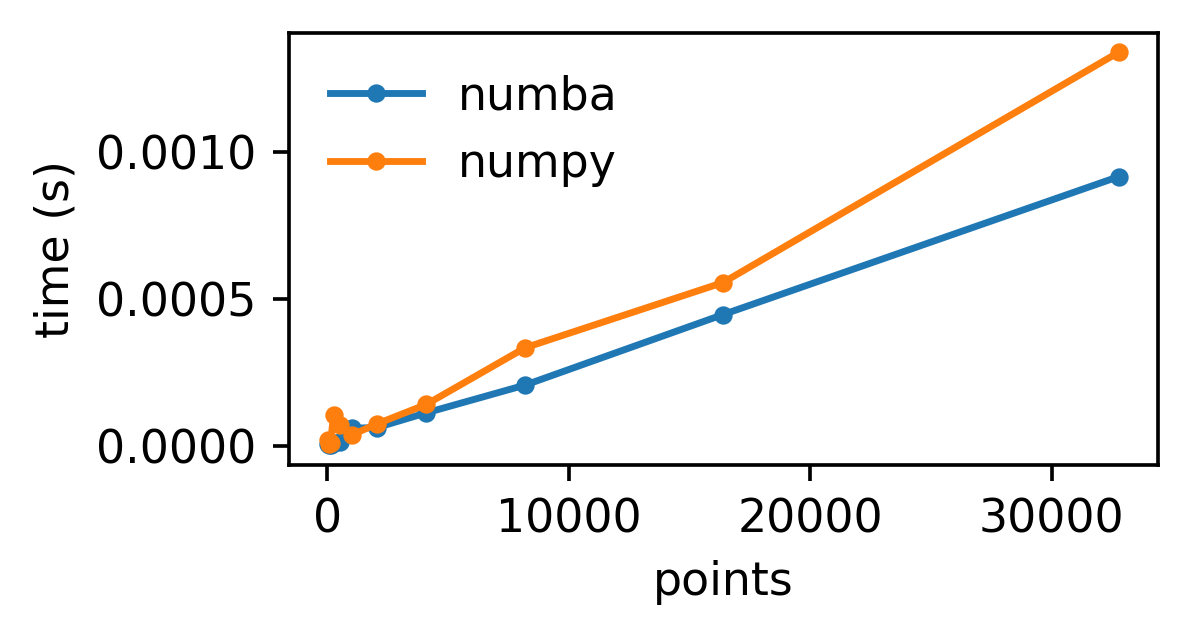

In [8]:
import matplotlib.pyplot as plt

x = [2**i for i in range(*_slice)]

fig, ax = plt.subplots(figsize=(3.4, 3.4 * 0.5), dpi=330)
for key, val in times.items():
    ax.plot(x, val, label=key, marker="o", markersize=3)
ax.legend(edgecolor="none")
ax.set_xlabel("points")
ax.set_ylabel("time (s)")